In [2]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re

In [3]:
df_abusive = pd.read_csv("abusive.csv")
df_abusive

,ABUSIVE
0,alay
1,ampas
2,buta
3,keparat
4,anjing
...,...
120,rezim
121,sange
122,serbet
123,sipit


In [4]:
df_kamus = pd.read_csv("new_kamusalay.csv", encoding='latin1', header=None, names=['kata salah','kata benar'])
df_kamus

,kata salah,kata benar
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali
...,...,...
15162,mendikbud,menteri pendidikan dan kebudayaan
15163,mendag,menteri perdagangan
15164,menaker,menteri tenaga kerja
15165,memetwit,mentwit


In [5]:
df_data = pd.read_csv("data.csv", encoding='latin1')
df_data

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
df_data['Tweet'] = df_data['Tweet'].apply(lambda x: re.sub(r'\\', '', x) if isinstance(x, str) else x)
df_data['Tweet'] = df_data['Tweet'].apply(lambda x: re.sub(r'x\d+', '', x) if isinstance(x, str) else x)
df_data
df_data.to_csv('cleansed_data2.csv', index=False, encoding='utf-8')

In [7]:
kamus = dict(zip(df_kamus['kata salah'], df_kamus['kata benar']))
kamus

{'anakjakartaasikasik': 'anak jakarta asyik asyik',
 'pakcikdahtua': 'pak cik sudah tua',
 'pakcikmudalagi': 'pak cik muda lagi',
 't3tapjokowi': 'tetap jokowi',
 '3x': 'tiga kali',
 'aamiin': 'amin',
 'aamiinn': 'amin',
 'aamin': 'amin',
 'aammiin': 'amin',
 'abis': 'habis',
 'abisin': 'habiskan',
 'acau': 'kacau',
 'achok': 'ahok',
 'ad': 'ada',
 'adek': 'adik',
 'adl': 'adalah',
 'adlah': 'adalah',
 'adlh': 'adalah',
 'ado': 'ada',
 'aduhh': 'aduh',
 'aer': 'air',
 'afdol': 'afdal',
 'agamaataualqur': 'agama alquran',
 'agm': 'agama',
 'agma': 'agama',
 'ahaha': 'haha',
 'ahahaha': 'haha',
 'ahehehehe': 'hehe',
 'ahir': 'akhir',
 'ahirnya': 'akhirnya',
 'ahk': 'ahok',
 'ahlamdulillah': 'alhamdulillah',
 'ahli2': 'para ahli',
 'ahlusunnah': 'ahlus sunah',
 'ahmaddani': 'ahmad dhani',
 'aho': 'ahok',
 'ahoax': 'ahok',
 'ahoaxx': 'ahok',
 'ahog': 'ahok',
 'ahokataudjarot': 'ahok djarot',
 'ahokbebanijokowi': 'ahok beban jokowi',
 'ahokbtp': 'ahok basuki tjahaja purnama',
 'ahokditolakw

In [8]:


def cleanse_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    return text

df_data['Tweet'] = df_data['Tweet'].apply(cleanse_text)
df_data

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,rt user user siapa yang telat ngasih tau elu ...,0,1,0,0,0,0,0,0,0,0,0,0
2,41 kadang aku berfikir kenapa aku tetap perc...,0,0,0,0,0,0,0,0,0,0,0,0
3,user user aku itu akunnku tau matamu sipit tap...,0,0,0,0,0,0,0,0,0,0,0,0
4,user user kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,user jangan asal ngomong ndasmu congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,user kasur mana enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0
13166,user hati hati bisu gnnlagi bosan huft xf0...,0,0,0,0,0,0,0,0,0,0,0,0
13167,user user user user bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
def word_correction (text):
    words = text.split()
    correction_text = []
    for word in words:
        if word in kamus:
            correction_text.append(kamus[word])
        else:
            correction_text.append(word)
    return ' '.join(correction_text)

df_data['Tweet'] = df_data['Tweet'].apply(word_correction)


In [10]:
abusive_patterns = df_abusive['ABUSIVE'].tolist()

abusive_word_counts = []
for text in df_data['Tweet']:
    count = sum(1 for word in abusive_patterns if re.search(fr'\b{re.escape(word)}\b', text, flags=re.IGNORECASE))
    abusive_word_counts.append(count)
    
df_data['abusive_word_count'] = abusive_word_counts

In [11]:
# kamus = dict(zip(df_kamus['kata salah'], df_kamus['kata benar']))
# kamus

In [12]:
def word_correction (text):
    words = text.split()
    correction_text = []
    for word in words:
        if word in kamus:
            correction_text.append(kamus[word])
        else:
            correction_text.append(word)
    return ' '.join(correction_text)

df_data['Tweet'] = df_data['Tweet'].apply(word_correction)

# df_data.to_csv('cleansed_data5.csv', index=False, encoding='utf-8')
df_data

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,abusive_word_count
0,di saat semua cowok berusaha melacak perhatian...,1,1,1,0,0,0,0,0,1,1,0,0,1
1,rt pengguna pengguna siapa yang telat memberi ...,0,1,0,0,0,0,0,0,0,0,0,0,2
2,41 kadang aku berpikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0,0
3,pengguna pengguna aku itu akunnku tau matamu s...,0,0,0,0,0,0,0,0,0,0,0,0,1
4,pengguna pengguna kaum cebong kafir sudah keli...,1,1,0,1,1,0,0,0,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,pengguna jangan asal berbicara ndasmu congor k...,1,1,1,0,0,0,1,0,0,1,0,0,2
13165,pengguna kasur mana enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0,1
13166,pengguna hati hati bisu gnnlagi bosan aduh xf0...,0,0,0,0,0,0,0,0,0,0,0,0,1
13167,pengguna pengguna pengguna pengguna bom yang r...,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
df_data.duplicated().sum()

206

In [14]:
df_data = df_data.drop_duplicates()
df_data.duplicated().sum()

0

In [15]:
df_data['total_char'] = df_data.Tweet.apply(len)
df_data['word'] = df_data.Tweet.apply(lambda x: x.split())
df_data['total_word'] = df_data.Tweet.apply(lambda sent: len(sent.split()))

df_data.head()

C:\Users\fakhr\AppData\Local\Temp\ipykernel_28540\3168461717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['total_char'] = df_data.Tweet.apply(len)
C:\Users\fakhr\AppData\Local\Temp\ipykernel_28540\3168461717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['word'] = df_data.Tweet.apply(lambda x: x.split())
C:\Users\fakhr\AppData\Local\Temp\ipykernel_28540\3168461717.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,abusive_word_count,total_char,word,total_word
0,di saat semua cowok berusaha melacak perhatian...,1,1,1,0,0,0,0,0,1,1,0,0,1,133,"[di, saat, semua, cowok, berusaha, melacak, pe...",22
1,rt pengguna pengguna siapa yang telat memberi ...,0,1,0,0,0,0,0,0,0,0,0,0,2,128,"[rt, pengguna, pengguna, siapa, yang, telat, m...",22
2,41 kadang aku berpikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0,0,251,"[41, kadang, aku, berpikir, kenapa, aku, tetap...",39
3,pengguna pengguna aku itu akunnku tau matamu s...,0,0,0,0,0,0,0,0,0,0,0,0,1,81,"[pengguna, pengguna, aku, itu, akunnku, tau, m...",14
4,pengguna pengguna kaum cebong kafir sudah keli...,1,1,0,1,1,0,0,0,0,0,1,0,3,94,"[pengguna, pengguna, kaum, cebong, kafir, suda...",14


In [16]:
from nltk.tokenize import word_tokenize

def word_tokenize_wrapper(text):
    return word_tokenize(text)

df_data['text_token'] = df_data['Tweet'].apply(word_tokenize_wrapper)
df_data.head()

C:\Users\fakhr\AppData\Local\Temp\ipykernel_28540\2101656470.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['text_token'] = df_data['Tweet'].apply(word_tokenize_wrapper)


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,abusive_word_count,total_char,word,total_word,text_token
0,di saat semua cowok berusaha melacak perhatian...,1,1,1,0,0,0,0,0,1,1,0,0,1,133,"[di, saat, semua, cowok, berusaha, melacak, pe...",22,"[di, saat, semua, cowok, berusaha, melacak, pe..."
1,rt pengguna pengguna siapa yang telat memberi ...,0,1,0,0,0,0,0,0,0,0,0,0,2,128,"[rt, pengguna, pengguna, siapa, yang, telat, m...",22,"[rt, pengguna, pengguna, siapa, yang, telat, m..."
2,41 kadang aku berpikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0,0,251,"[41, kadang, aku, berpikir, kenapa, aku, tetap...",39,"[41, kadang, aku, berpikir, kenapa, aku, tetap..."
3,pengguna pengguna aku itu akunnku tau matamu s...,0,0,0,0,0,0,0,0,0,0,0,0,1,81,"[pengguna, pengguna, aku, itu, akunnku, tau, m...",14,"[pengguna, pengguna, aku, itu, akunnku, tau, m..."
4,pengguna pengguna kaum cebong kafir sudah keli...,1,1,0,1,1,0,0,0,0,0,1,0,3,94,"[pengguna, pengguna, kaum, cebong, kafir, suda...",14,"[pengguna, pengguna, kaum, cebong, kafir, suda..."


In [84]:
from nltk.corpus import stopwords

list_stopwords = stopwords.words('indonesian')

list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', 'xf0', 'f', 'pengguna', 'url',
                       'resource', 'locator', 'uniform', 'gue', 'orang',
                       'kayak', 'ce', 'banget', 'wkwk', 'haha', 'dasar',
                       ])

list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

df_data["text_remove_stopwords"]= df_data['text_token'].apply(stopwords_removal)

df_data["text_remove_stopwords"]=df_data["text_remove_stopwords"].str.join(sep=" ")

C:\Users\fakhr\AppData\Local\Temp\ipykernel_28540\3032829749.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data["text_remove_stopwords"]= df_data['text_token'].apply(stopwords_removal)
C:\Users\fakhr\AppData\Local\Temp\ipykernel_28540\3032829749.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data["text_remove_stopwords"]=df_data["text_remove_stopwords"].str.join(sep=" ")


<AxesSubplot:>

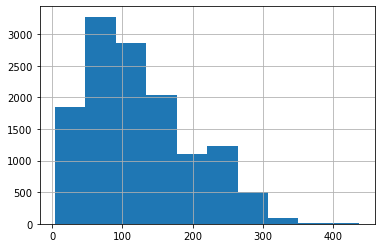

In [33]:
df_data.total_char.hist()

Text(0.5, 1.0, 'total word')

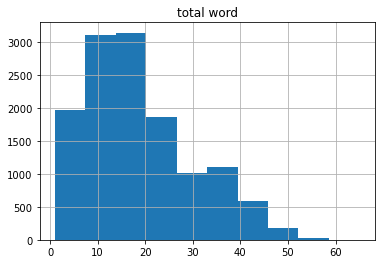

In [75]:
df_data.total_word.hist()
plt.title("total word")

In [19]:
sentence_count = df_data.groupby(df_data.HS).size()
sentence_count

HS
0    7470
1    5493
dtype: int64

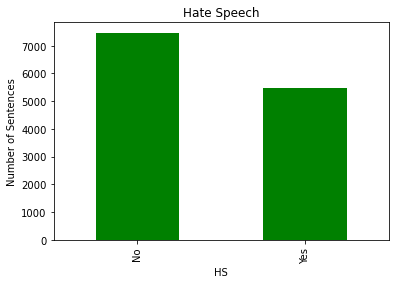

In [20]:
sentence_count.plot(kind='bar', color='green')
plt.xlabel('HS')
plt.ylabel('Number of Sentences')
plt.title('Hate Speech')

plt.xticks([0, 1], ['No', 'Yes'])

plt.show()

In [21]:
sentence_count = df_data.groupby(df_data.HS_Race).size()
sentence_count

HS_Race
0    12405
1      558
dtype: int64

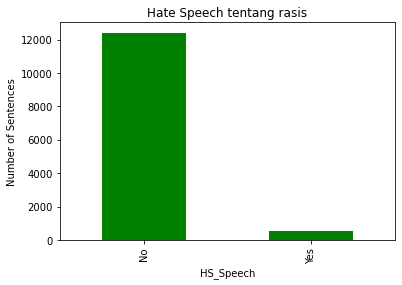

In [22]:
sentence_count.plot(kind='bar', color='green')
plt.xlabel('HS_Speech')
plt.ylabel('Number of Sentences')
plt.title('Hate Speech tentang rasis')

plt.xticks([0, 1], ['No', 'Yes'])

plt.show()

In [23]:
sentence_count = df_data.groupby(df_data.Abusive).size()
sentence_count

Abusive
0    7986
1    4977
dtype: int64

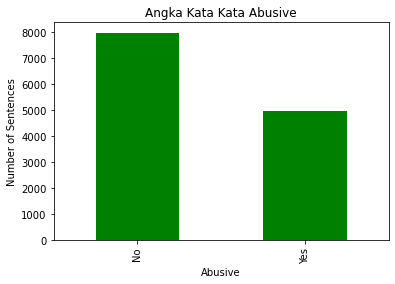

In [24]:
sentence_count.plot(kind='bar', color='green')
plt.xlabel('Abusive')
plt.ylabel('Number of Sentences')
plt.title('Angka Kata Kata Abusive')

plt.xticks([0, 1], ['No', 'Yes'])

plt.show()

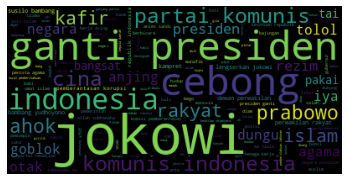

In [25]:
text = ' '.join(df_data['text_remove_stopwords'][df_data.HS==1])
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

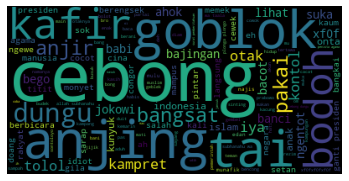

In [26]:
text = ' '.join(df_data['text_remove_stopwords'][df_data.Abusive==1])
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

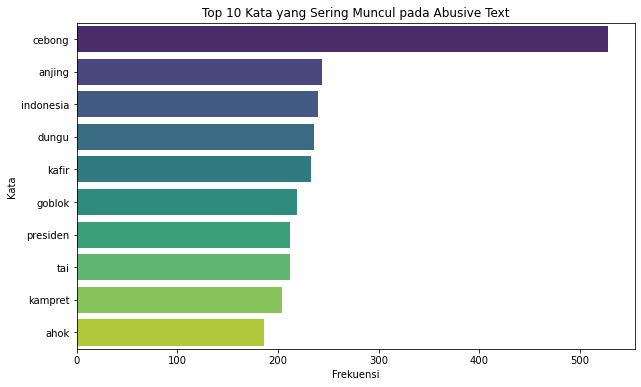

In [87]:
import seaborn as sns
text_abusive = ' '.join(df_data['text_remove_stopwords'][df_data['Abusive'] == 1])
word_frequencies = pd.Series(text_abusive.split()).value_counts()
top_words = word_frequencies.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_words.values, y=top_words.index, palette='viridis')
plt.title('Top 10 Kata yang Sering Muncul pada Abusive Text')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [89]:
text_abusive = ' '.join(df_data['text_remove_stopwords'][df_data['Abusive'] == 1])
word_frequencies = pd.Series(text_abusive.split()).value_counts()
top_words = word_frequencies.head(10)
print("\nTop 10 Kata yang Sering Muncul:")
print("===================")
for word, frequency in top_words.items():
    print(f"{word}: {frequency} kali")


Top 10 Kata yang Sering Muncul:
cebong: 528 kali
anjing: 244 kali
indonesia: 240 kali
dungu: 236 kali
kafir: 233 kali
goblok: 219 kali
presiden: 212 kali
tai: 212 kali
kampret: 204 kali
ahok: 186 kali


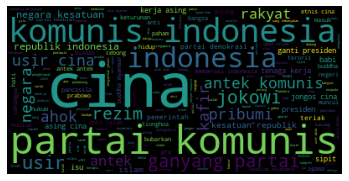

In [27]:
text = ' '.join(df_data['text_remove_stopwords'][df_data.HS_Race==1])
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [91]:
text_racist = ' '.join(df_data['text_remove_stopwords'][df_data['HS_Race'] == 1])
word_frequencies = pd.Series(text_racist.split()).value_counts()
top_words = word_frequencies.head(10)
print("\nTop 10 Kata yang Sering Muncul:")
print("===================")
for word, frequency in top_words.items():
    print(f"{word}: {frequency} kali")


Top 10 Kata yang Sering Muncul:
indonesia: 370 kali
komunis: 351 kali
cina: 347 kali
partai: 219 kali
antek: 86 kali
usir: 86 kali
negara: 59 kali
jokowi: 49 kali
islam: 46 kali
ganyang: 45 kali


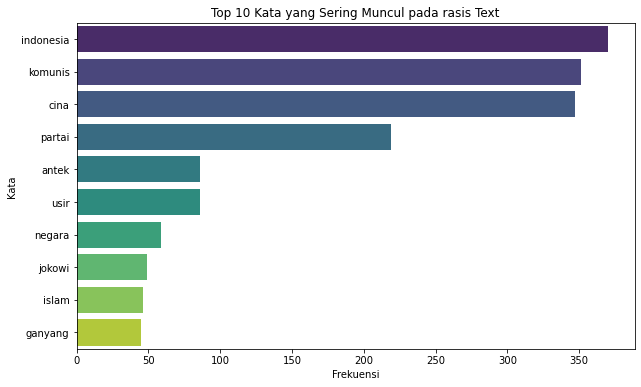

In [85]:
text_racist = ' '.join(df_data['text_remove_stopwords'][df_data['HS_Race'] == 1])
word_frequencies = pd.Series(text_racist.split()).value_counts()
top_words = word_frequencies.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_words.values, y=top_words.index, palette='viridis')
plt.title('Top 10 Kata yang Sering Muncul pada rasis Text')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()